# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.

# Part IV: Unconstrained optimization

This notebook replicates the examples from the book, using the python package optimization_book. The numbering of the algorithms, tables and page refer to the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optimization_book.unconstrained as unc
%matplotlib inline

## Chapter 9: Quadratic problems

### Algorithm 9.1: quadratic problems: direct solution

Example 9.8: $Q=\left(\begin{array}{cccc} 1& 1 & 1 & 1 \\ 1 & 2 & 2 & 2 \\ 1 & 2 & 3 & 3 \\ 1 & 2 & 3 & 4\end{array}\right)$, $b=\left(\begin{array}{c}-4 \\ -7 \\ -9 \\ -10\end{array}\right)$

In [2]:
Q = np.array([[1, 1, 1, 1],
              [1, 2, 2, 2],
              [1, 2, 3, 3],
              [1, 2, 3, 4]])
b = np.array([-4, -7, -9, -10])
s = unc.quadraticDirect(Q, b)
print(s)

[1. 1. 1. 1.]


### Algorithm 9.2: Conjugate gradient method

Run the algorithm from $x_0=\left(\begin{array}{c}5 \\ 5 \\ 5 \\ 5 \end{array}\right)$.

In [3]:
x0 = np.array([5.0, 5.0, 5.0, 5.0])
x, iters = unc.conjugateGradient(Q, b, x0)
print(x)

[1. 1. 1. 1.]


Calculate the gradient, to check that it is indeed numerically close to 0.

In [4]:
print(Q @ x + b)

[-1.65822911e-12 -3.11484172e-12 -4.19397850e-12 -4.76418904e-12]


In [5]:
iters

[[array([5., 5., 5., 5.]),
  array([16., 28., 36., 40.]),
  array([-16., -28., -36., -40.]),
  0.12076583210603829,
  0],
 [array([3.06774669, 1.6185567 , 0.65243004, 0.16936672]),
  array([ 1.50810015,  0.94845361, -0.22974963, -1.06038292]),
  array([-1.52578766, -0.97940675,  0.18995274,  1.01616414]),
  1.0295339918406097,
  0.0011054692894268978],
 [array([1.49689643, 0.61022416, 0.84799284, 1.21554224]),
  array([ 0.17065568, -0.15558507, -0.09204998,  0.12349226]),
  array([-0.19767568,  0.13824087,  0.09541383, -0.10549713]),
  2.371723466909885,
  0.017708885746057765],
 [array([1.02806438, 0.93809327, 1.07428807, 0.96533223]),
  array([ 0.00577796, -0.01650846,  0.02311184, -0.01155592]),
  array([-0.00827569,  0.0182552 , -0.02190624,  0.01022291]),
  3.391182645206431,
  0.012635498600378211],
 [array([1., 1., 1., 1.]),
  array([-1.65822911e-12, -3.11484172e-12, -4.19397850e-12, -4.76418904e-12]),
  array([1.65822911e-12, 3.11484172e-12, 4.19397850e-12, 4.76418904e-12]),
  

Table 9.1, page 231.

In [6]:
def oneIter(k, iter):
    for i in range(4):
        if i == 0:
            print(f'{k}\t'
                  f'{iter[0][i]:+E}\t'
                  f'{iter[1][i]:+E}\t'
                  f'{iter[2][i]:+E}\t'
                  f'{iter[3]:+E}\t'
                  f'{iter[4]:+E}')
        else:
            print(f'\t'
                  f'{iter[0][i]:+E}\t'
                  f'{iter[1][i]:+E}\t'
                  f'{iter[2][i]:+E}')


In [7]:
print("k\txk\t\tgk\t\tdk\t\talphak\t\tbetak")
for k, it in enumerate(iters):
    print(85*'-')
    oneIter(k, it)
   

k	xk		gk		dk		alphak		betak
-------------------------------------------------------------------------------------
0	+5.000000E+00	+1.600000E+01	-1.600000E+01	+1.207658E-01	+0.000000E+00
	+5.000000E+00	+2.800000E+01	-2.800000E+01
	+5.000000E+00	+3.600000E+01	-3.600000E+01
	+5.000000E+00	+4.000000E+01	-4.000000E+01
-------------------------------------------------------------------------------------
1	+3.067747E+00	+1.508100E+00	-1.525788E+00	+1.029534E+00	+1.105469E-03
	+1.618557E+00	+9.484536E-01	-9.794067E-01
	+6.524300E-01	-2.297496E-01	+1.899527E-01
	+1.693667E-01	-1.060383E+00	+1.016164E+00
-------------------------------------------------------------------------------------
2	+1.496896E+00	+1.706557E-01	-1.976757E-01	+2.371723E+00	+1.770889E-02
	+6.102242E-01	-1.555851E-01	+1.382409E-01
	+8.479928E-01	-9.204998E-02	+9.541383E-02
	+1.215542E+00	+1.234923E-01	-1.054971E-01
-------------------------------------------------------------------------------------
3	+1.028064E+00	+5.777961

An error is triggered if the matrix is not definite positive. Here, $Q=\left(\begin{array}{cccc} 1& 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 9 & 10 & 11 & 12 \\ 13 & 14 & 15 & 16\end{array}\right)$

In [8]:
Q = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8],
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
b = np.array([-4, -7, -9, -10])
x0 = np.array([5.0, 5.0, 5.0, 5.0])
try:
    x, iters = unc.conjugateGradient(Q, b, x0)
except Exception as e:
    print(f'Exception raised: {e}')

Exception raised: The matrix must be positive definite


## Chapter 10: Newton's local method


### Algorithm 10.1: Newton's local method

Example 5.8: $f(x_1,x_2) = \frac{1}{2} x_1^2 + x_1 \cos(x_2)$

In [9]:
def ex0508(x):
    f = 0.5 * x[0] * x[0] + x[0] * np.cos(x[1])
    g = np.array([x[0] + np.cos(x[1]),
                  -x[0] * np.sin(x[1])])
    H = np.array([[ 1, -np.sin(x[1])],
                  [ -np.sin(x[1]), -x[0] * np.cos(x[1])]])
    return f, g, H   

In [10]:
x0 = np.array([1, 1])
sol, iters, diagnostic = unc.newtonLocal(ex0508, x0, 1e-15)
print(diagnostic)
print(f'Solution: {sol}')

Required precision has been reached: 8.354257125844333e-17 <= 1e-15
Solution: [1.99044272e-17 1.57079633e+00]


Table 10.1, page 237

In [11]:
title = 'k                  xk        Grad(xk)    ||Grad(xk)||           f(xk)'
print(title)
print(len(title)*'-')
for it in iters:
    print(f'{it[0]}\t'
          f'{it[1][0]:+E}\t'
          f'{it[3][0]:+E}\t'
          f'{np.linalg.norm(it[3]):+E}\t'
          f'{it[2]:+E}')
    print(f'\t{it[1][1]:+E}\t'
          f'{it[3][1]:+E}')

k                  xk        Grad(xk)    ||Grad(xk)||           f(xk)
---------------------------------------------------------------------
0	+1.000000E+00	+1.540302E+00	+1.755165E+00	+1.040302E+00
	+1.000000E+00	-8.414710E-01
1	-2.338451E-01	-2.870770E-02	+2.306654E-01	-2.062862E-02
	+1.364192E+00	+2.288720E-01
2	+1.081438E-02	-3.225248E-03	+1.128405E-02	-9.335440E-05
	+1.584836E+00	-1.081331E-02
3	-2.132377E-06	+9.228287E-07	+2.323498E-06	-4.241334E-12
	+1.570793E+00	+2.132377E-06
4	+1.990443E-17	+8.113677E-17	+8.354257E-17	+1.416888E-33
	+1.570796E+00	-1.990443E-17


Figure 10.1 (a), page 238

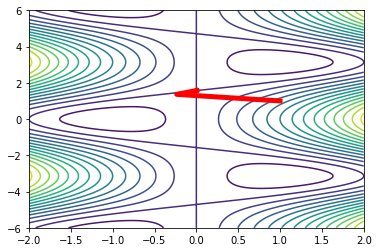

In [12]:
import matplotlib.pyplot as plt
def theFunctionToPlot(x, y):
    return(0.5 * x * x + x * np.cos(y))

xlist = np.linspace(-2.0, 2.0, 1000)
ylist = np.linspace(-6.0, 6.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [it[1][0] for it in iters]
yiter = [it[1][1] for it in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.show()

Figure 10.1 (b), page 238

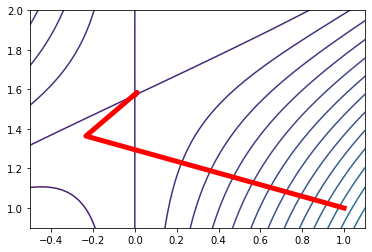

In [13]:
plt.contour(X, Y, Z, 50)
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.xlim(-0.5, 1.1)
plt.ylim(0.9, 2)
plt.show()

### Algorithm 10.2: Newton's local method by quadratic modeling


We test the algorithm on the Rosenbrock function. It is described in Section 11.6 of the book for two variables.  The implementation below involves $n$ variables: \\[f(x) = \sum_{i=1}^{n-1} f_i(x) = \sum_{i=1}^{n-1} 100 (x_{i+1}-x_i^2)^2 + (1-x_i)^2.\\]
The calculation of the derivatives is based on the partial derivatives of the functions $f_i$:
\\[
\begin{array}{rcl}
\partial f_i/\partial x_i&=& -400 x_i (x_{i+1}-x_i^2) - 2(1-x_i), \\\\
\partial f_i/\partial x_{i+1}&=& 200 (x_{i+1}-x_i^2), \\\\
\partial^2 f_i/\partial x^2_i  &=& -400 x_{i+1}+ 1200 x_i^2 + 2, \\\\
\partial^2 f_i/\partial x_i \partial x_{i+1}  &=& -400 x_i^2, \\\\
\partial^2 f_i/\partial x^2_{i+1}  &=& 200. 
\end{array}
\\]


In [14]:
def exRosenbrock(x):
    n = len(x)
    f = sum(100.0 * (x[i+1]-x[i]**2)**2 + (1.0-x[i])**2 for i in range(n-1))
    g = np.zeros(n)
    for i in range(n-1):
        g[i] = g[i] - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1-x[i])
        g[i+1] = g[i+1] + 200 * (x[i+1] - x[i]**2)
    H = np.zeros((n, n))
    for i in range(n-1):
        H[[i], [i]] = H[[i], [i]] - 400 * x[i+1] + 1200 * x[i]**2 + 2
        H[[i+1], [i]] = H[[i+1], [i]] - 400 * x[i]
        H[[i], [i+1]] = H[[i], [i+1]] - 400 * x[i]
        H[[i+1], [i+1]] = H[[i+1], [i+1]] + 200
    return f, g, H

In [15]:
x0 = np.array([-1.5, 2])
sol, iters, diagnostic = unc.newtonLocalQuadratic(exRosenbrock, x0, 1e-15)
print(diagnostic)
print(f'Solution: {sol}')

Required precision has been reached: 0.0 <= 1e-15
Solution: [1. 1.]


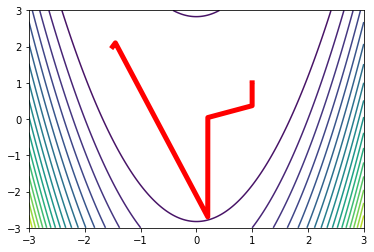

In [16]:
def theFunctionToPlot(x,y):
    return(100 * (y - x * x)**2 + (1 - x)**2)

xlist = np.linspace(-3.0, 3.0, 1000)
ylist = np.linspace(-3.0, 3.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 20)
xiter = [it[0][0] for it in iters]
yiter = [it[0][1] for it in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()

We now apply the algorithm on example 5.8. In this case, the algorithm fails to converge, as one hessian is not positive definite. We try first using the direct method to solve the quadratic problem. An exception is triggered. 

In [17]:
x0 = np.array([1.1, 1.1])
try:
    sol, iters, diagnostic = unc.newtonLocalQuadratic(ex0508, x0, 1e-15)
except Exception as e:
    print(f'Exception raised: {e}')

Exception raised: 2-th leading minor of the array is not positive definite


If we try with the conjugate gradient method, an error is also triggered. 

In [18]:
try:
    sol, iters, diagnostic = unc.newtonLocalQuadratic(ex0508, x0, 1e-15, True)
except Exception as e:
    print(f'Exception raised: {e}')

Exception raised: The matrix must be positive definite


## Chapter 11: Descent methods and line search

### Algorithm 11.2: Initialization of the exact line search 


Test with Example 11.3: $h(x) = (2+x) \cos(2+x)$.

In [19]:
def h(x):
    return (2.0 + x) * np.cos(2.0 + x)

In [20]:
delta = 6
result = unc.initQuadraticLineSearch(h, delta)
print(result)

(0, -0.8322936730942848, 6, -1.1640002704689083, 12, 1.9143210549096705)


### Algorithm 11.3: Exact line search: quadratic interpolation


Test with Example 11.3: $h(x) = (2+x) \cos(2+x)$.

In [21]:
xstar, iters = unc.quadraticInterpolation(h, 6, 1.0e-3)
xstar

7.529334397772614

Table 11.2, p.256.

In [22]:
title = 'k   a        b       c         x*      h(a)     h(b)     h(c)     h(x^*)  '
print(title)
print(len(title)*'-')
for k, it in enumerate(iters):
    print(f'{k+1:2} '
          f'{it[0]:8.5f} '
          f'{it[1]:8.5f} '
          f'{it[2]:8.5f} '
          f'{it[3]:8.5f} '
          f'{it[4]:8.5f} '
          f'{it[5]:8.5f} '
          f'{it[6]:8.5f} '
          f'{it[7]:8.5f}')

k   a        b       c         x*      h(a)     h(b)     h(c)     h(x^*)  
--------------------------------------------------------------------------
 1  0.00000  6.00000 12.00000  3.58364 -0.83229 -1.16400  1.91432  4.27225
 2  3.58364  6.00000 12.00000  8.21855  4.27225 -1.16400  1.91432 -7.16487
 3  6.00000  8.21855 12.00000  8.69855 -1.16400 -7.16487  1.91432 -3.13122
 4  6.00000  8.21855  8.69855  7.43782 -1.16400 -7.16487 -3.13122 -9.43702
 5  6.00000  7.43782  8.21855  7.45558 -1.16400 -9.43702 -7.16487 -9.45109
 6  7.43782  7.45558  8.21855  7.52836 -9.43702 -9.45109 -7.16487 -9.47729
 7  7.45558  7.52836  8.21855  7.52898 -9.45109 -9.47729 -7.16487 -9.47729
 8  7.52836  7.52898  8.21855  7.52933 -9.47729 -9.47729 -7.16487 -9.47729
 9  7.52898  7.52933  8.21855  7.52933 -9.47729 -9.47729 -7.16487 -9.47729
10  7.52933  7.52933  8.21855  7.52933 -9.47729 -9.47729 -7.16487 -9.47729
11  7.52933  7.52933  8.21855  7.52933 -9.47729 -9.47729 -7.16487 -9.47729
12  7.52933  7.52933  8.2

Quadratic interpolant for the figures. See pp. 252-253

In [23]:
def interpolant(a, b, c, x, ha, hb, hc, hx):
    b3 = ha / (a-b)
    b2 = hb / (b-a)
    b1num = (b-c) * ha + (c-a) * hb + (a-b) * hc
    b1denom = (a-b) * (c-a) * (c-b) 
    b1 = b1num / b1denom
    def q(x):
        return(b1 * (x-a) * (x-b) + b2 * (x-a) + b3 * (x-b))
    return q

In [24]:
def plotIteration(iteration, xlow=0, xhigh=13):
    a, b, c, x, ha, hb, hc, hx = tuple(iters[iteration])
    q = interpolant(a, b, c, x, ha, hb, hc, hx)
    xrange = np.arange(0.0,13.0,0.001)
    plt.plot(xrange, h(xrange), '-', xrange, q(xrange), '--')
    shift = 0.2
    plt.annotate('a', xy=(a,ha), xytext=(a+shift, ha+2*shift))
    plt.annotate('b', xy=(b,hb), xytext=(b+shift, hb+2*shift))
    plt.annotate('c', xy=(c,hc), xytext=(c+shift, hc+2*shift))
    plt.annotate('x', xy=(x,hx), xytext=(x+shift, hx+2*shift))
    xopt, yopt = [x, x], [q(x), h(x)]
    plt.xlim(xlow, xhigh)
    plt.ylim(-20, 20)
    plt.plot(xopt,yopt)
    plt.show()

Figure 11.2, page 255.

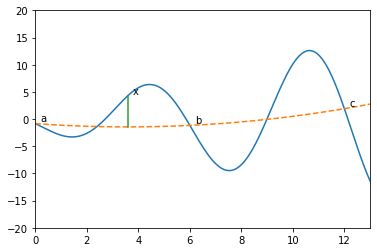

In [25]:
plotIteration(0)

Figure 11.3, page 255

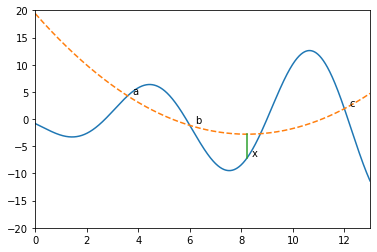

In [26]:
plotIteration(1)

Figure 11.4, page 257

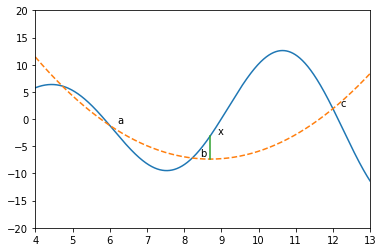

In [27]:
plotIteration(2, xlow=4)

Figure 11.5, page 257

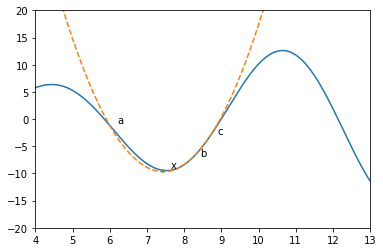

In [28]:
plotIteration(3, xlow=4)

### Algorithm 11.3: Exact line search: golden section

Test with Example 11.4: $h(x) = (2+x) \cos(2+x)$.

In [29]:
xstar, iters = unc.goldenSection(h, 5, 10, 1.0e-3)
xstar

7.5293254974342965

Table 11.3, page 261.

In [30]:
title = ' k      ell   alpha1   alpha2        u       h1       h2'
print(title)
print(len(title)*'-')
for k, it in enumerate(iters):
    print(f'{k+1:2} '
          f'{it[0]:8.5f} '
          f'{it[1]:8.5f} '
          f'{it[2]:8.5f} '
          f'{it[3]:8.5f} '
          f'{it[4]:8.5f} '
          f'{it[5]:8.5f} ')

 k      ell   alpha1   alpha2        u       h1       h2
--------------------------------------------------------
 1  5.00000  6.90983  8.09017 10.00000 -7.75439 -7.93768 
 2  6.90983  8.09017  8.81966 10.00000 -7.93768 -1.89353 
 3  6.90983  7.63932  8.09017  8.81966 -9.41833 -7.93768 
 4  6.90983  7.36068  7.63932  8.09017 -9.34146 -9.41833 
 5  7.36068  7.63932  7.81153  8.09017 -9.41833 -9.08684 
 6  7.36068  7.53289  7.63932  7.81153 -9.47723 -9.41833 
 7  7.36068  7.46711  7.53289  7.63932 -9.45863 -9.47723 
 8  7.46711  7.53289  7.57354  7.63932 -9.47723 -9.46780 
 9  7.46711  7.50776  7.53289  7.57354 -9.47504 -9.47723 
10  7.50776  7.53289  7.54842  7.57354 -9.47723 -9.47553 
11  7.50776  7.52329  7.53289  7.54842 -9.47712 -9.47723 
12  7.52329  7.53289  7.53882  7.54842 -9.47723 -9.47686 
13  7.52329  7.52922  7.53289  7.53882 -9.47729 -9.47723 
14  7.52329  7.52696  7.52922  7.53289 -9.47727 -9.47729 
15  7.52696  7.52922  7.53062  7.53289 -9.47729 -9.47729 
16  7.52696  7.5

Figure 11.8, page 261

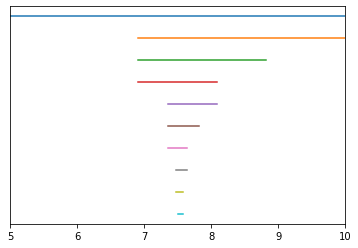

In [31]:
nbr = 10
plt.xlim(5,10)
for k in range(nbr):
    l = iters[k][0]
    u = iters[k][3]
    plt.plot([l,u],[nbr-k/2,nbr-k/2])   
plt.tick_params(
    axis='y',          
    left=False,        
    labelleft = False)      
plt.show()

### Algorithm 11.5:  Inexact line search

Table 11.6

In [32]:
x = np.array([10, 1])
d = np.array([-2 / np.sqrt(5), 1 / np.sqrt(5)])
alpha0 = 1.0e-3
beta1 = 0.3
beta2 = 0.7
ell = 20

In [33]:
def ex1102(x):
    f = 0.5 * x[0] * x[0] + 4.5 * x[1] * x[1]
    g = np.array([x[0], 9 * x[1]])
    return f, g

In [34]:
alpha, iters = unc.lineSearch(ex1102, x, d, alpha0, beta1, beta2, ell)
alpha

2.3000000000000003

Table 11.6

In [35]:
print(" k   alphai  alpha_ell    alpha_r")
print(50*'-')
for k, it in enumerate(iters):
    print(f'{k+1:2} '
          f'{it[0]:9.5f} '
          f'{it[1]:9.5f} '
          f'{it[2]:10.3E} '
          f'{it[3]} ')

 k   alphai  alpha_ell    alpha_r
--------------------------------------------------
 1   0.00100   0.00000 1.798E+308  
 2   0.02000   0.00100 1.798E+308 too short 
 3   0.40000   0.02000 1.798E+308 too short 
 4   8.00000   0.40000 1.798E+308 too short 
 5   4.20000   0.40000  8.000E+00 too long 
 6   2.30000   0.40000  4.200E+00 too long 
 7   2.30000   0.40000  4.200E+00 ok 


### 11.4: Steepest descent method

### Algorithm 11.7: Modified Cholesky factorization


Example not in the book

In [36]:
A = np.array([[    1.0000  ,  3.5000  ,  6.0000  ,  8.5000],
   [ 3.5000 ,   6.0000   , 8.5000 ,  11.0000],
   [ 6.0000  ,  8.5000 ,  11.0000  , 13.5000],
   [ 8.5000  , 11.0000  , 13.5000  , 16.0000]])

In [37]:
(L, tau) = unc.modifiedCholesky(A)
print("tau = ",tau)
print(L)

tau =  18.748333259252675
[[4.44390968 0.         0.         0.        ]
 [0.78759476 4.91202888 0.         0.        ]
 [1.35016245 1.51396079 5.06293564 0.        ]
 [1.91273014 1.93271334 1.57842247 4.98628101]]


We have that $L L^T = A + \tau I$ or, equavalently, $L L^T - A = \tau I$. 

In [38]:
L @ L.T - A

array([[1.87483333e+01, 4.44089210e-16, 8.88178420e-16, 0.00000000e+00],
       [4.44089210e-16, 1.87483333e+01, 0.00000000e+00, 0.00000000e+00],
       [8.88178420e-16, 0.00000000e+00, 1.87483333e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87483333e+01]])

### Algorithm 11.8: Newton algorithm with line search


Example 5.8: $f(x_1,x_2) = \frac{1}{2} x_1^2 + x_1 \cos(x_2)$

In [39]:
x0 = np.array([1,1])
sol,iters = unc.newtonLineSearch(ex0508,x0, 1.0e-7)
print(sol)

[1.         3.14159265]


Iterations

In [40]:
for k in range(len(iters)):
    print(f'{iters[k][0][0]:10.6f}, {iters[k][0][1]:10.6f}')

  1.000000,   1.000000
  0.551277,   1.419683
  0.375743,   1.646469
  0.848214,   3.432926
  1.066119,   3.056026
  1.003240,   3.136743
  1.000012,   3.141577
  1.000000,   3.141593
  1.000000,   3.141593


Table 11.7, page 281

In [41]:
title = ' k        f(xk) ||Grad(xk)|| alpha         tau'
print(title)
print(len(title)*'-')
for k, it in enumerate(iters):
    f, g, _ = ex0508(it[0])
    ff = f'{f:11.5f} '
    gf = f'{np.linalg.norm(g):11.5e} '
    alpha = f'{it[3]} ' if it[3] is not None else ''
    tau = f'{it[2]:11.5f} ' if it[3] is not None else ''
    print(f'{k+1:2} ', ff, gf, alpha, tau)


 k        f(xk) ||Grad(xk)|| alpha         tau
----------------------------------------------
 1      1.04030  1.75517e+00   
 2      0.23494  8.88575e-01  1.0      1.64562 
 3      0.04218  4.80064e-01  1.0      1.72092 
 4     -0.45274  2.67169e-01  3.0      0.86449 
 5     -0.49391  1.14763e-01  1.0      0.00000 
 6     -0.49998  5.85175e-03  1.0      0.00000 
 7     -0.50000  1.94633e-05  1.0      0.00000 
 8     -0.50000  2.18522e-10  1.0      0.00000 
 9     -0.50000  1.22465e-16  1.0      0.00000 
